# 9.0简介

核心内容：本章介绍特征提取降维技术，包括PCA、KernelPCA、LDA、NMF和TSVD
重要提示：特征提取产生的新特征对人类不可解释，若需可解释性应使用特征选择

# 9.1使用主成分进行特征降维

问题描述：使用主成分分析（PCA）降低特征维度

In [3]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 加载数据
digits = datasets.load_digits()

# 标准化特征矩阵
features = StandardScaler().fit_transform(digits.data)

# 创建可以保留信息量99%（用方差表示） 的PCA
pca = PCA(n_components=0.99, whiten=True)
# 执行PCA
features_pca = pca.fit_transform(features)

# 显示结果
print('Original number of features:', features.shape[1])
print('Reduced number of features:', features_pca.shape[1])

Original number of features: 64
Reduced number of features: 54


讨论：
n_components=0.99：保留99%的方差信息量
whiten=True：将每个成分方差缩放到1
svd_solver="randomized"：使用随机SVD算法，通常更快
原理：寻找数据方差最大方向作为主成分，依次找出次要成分

# 9.2 对线性不可分数据进行特征降维

问题描述：对线性不可分数据（如环形数据）进行非线性降维

In [6]:
# 加载库
from sklearn.decomposition import PCA,KernelPCA
from sklearn.datasets import make_circles

#创建线性不可分数据
features, _ = make_circles(n_samples=1000,random_state=1,noise=0.1,factor=0.1)

#应用基于径向基函数（RBF）核的Kernel PCA方法
kpca = KernelPCA(kernel='rbf',gamma= 15,n_components=1)
features_kpca = kpca.fit_transform(features)
print('Original number of features:', features.shape[1])
print('Reduced number of features:', features_kpca.shape[1])

Original number of features: 2
Reduced number of features: 1


讨论：
KernelPCA：通过核机制将数据映射到高维空间使其线性可分
常用核函数：高斯径向基函数（RBF）、多项式核、Sigmoid核
gamma参数：控制RBF核的宽度
适用场景：数据呈环形或其他非线性结构

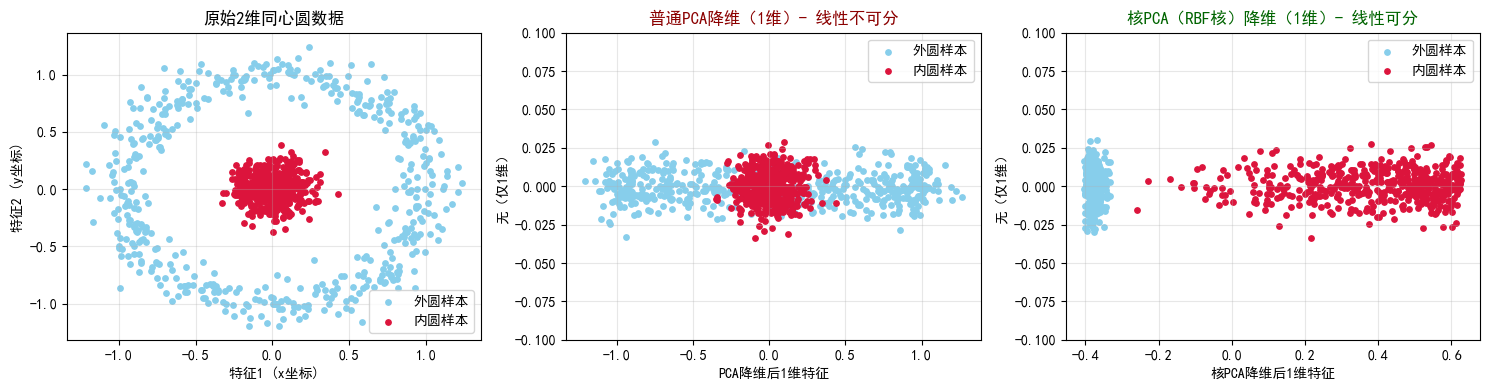

In [9]:
# 导入所需库
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
import numpy as np

# ---------------------- 解决中文乱码问题 ----------------------
plt.rcParams['font.sans-serif'] = ['SimHei']  # 替换为系统支持的中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# ---------------------- 1. 生成非线性可分的同心圆数据集 ----------------------
features, labels = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)

# ---------------------- 2. 初始化并训练普通PCA、核PCA ----------------------
pca = PCA(n_components=1)
features_pca = pca.fit_transform(features)

kpca = KernelPCA(kernel='rbf', gamma=15, n_components=1)
features_kpca = kpca.fit_transform(features)

# ---------------------- 3. 创建可视化画布 ----------------------
plt.rcParams['figure.figsize'] = (15, 4)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# ---------------------- 4. 绘制子图1：原始2维同心圆数据 ----------------------
ax1.scatter(features[labels==0, 0], features[labels==0, 1], c='skyblue', label='外圆样本', s=15)
ax1.scatter(features[labels==1, 0], features[labels==1, 1], c='crimson', label='内圆样本', s=15)
ax1.set_title('原始2维同心圆数据', fontsize=12, fontweight='bold')
ax1.set_xlabel('特征1 (x坐标)', fontsize=10)
ax1.set_ylabel('特征2 (y坐标)', fontsize=10)
ax1.legend(loc='best')
ax1.grid(alpha=0.3)

# ---------------------- 5. 绘制子图2：普通PCA降维到1维的结果 ----------------------
# 修正：y轴用np.zeros生成一维数组，确保和x维度一致
ax2.scatter(features_pca[labels==0, 0],
            np.zeros(len(features_pca[labels==0])) + 0.01*np.random.randn(len(features_pca[labels==0])),
            c='skyblue', label='外圆样本', s=15)
ax2.scatter(features_pca[labels==1, 0],
            np.zeros(len(features_pca[labels==1])) + 0.01*np.random.randn(len(features_pca[labels==1])),
            c='crimson', label='内圆样本', s=15)
ax2.set_title('普通PCA降维（1维）- 线性不可分', fontsize=12, fontweight='bold', color='darkred')
ax2.set_xlabel('PCA降维后1维特征', fontsize=10)
ax2.set_ylabel('无（仅1维）', fontsize=10)
ax2.legend(loc='best')
ax2.grid(alpha=0.3)
ax2.set_ylim(-0.1, 0.1)

# ---------------------- 6. 绘制子图3：核PCA（RBF核）降维到1维的结果 ----------------------
# 修正：y轴用np.zeros生成一维数组，确保和x维度一致
ax3.scatter(features_kpca[labels==0, 0],
            np.zeros(len(features_kpca[labels==0])) + 0.01*np.random.randn(len(features_kpca[labels==0])),
            c='skyblue', label='外圆样本', s=15)
ax3.scatter(features_kpca[labels==1, 0],
            np.zeros(len(features_kpca[labels==1])) + 0.01*np.random.randn(len(features_kpca[labels==1])),
            c='crimson', label='内圆样本', s=15)
ax3.set_title('核PCA（RBF核）降维（1维）- 线性可分', fontsize=12, fontweight='bold', color='darkgreen')
ax3.set_xlabel('核PCA降维后1维特征', fontsize=10)
ax3.set_ylabel('无（仅1维）', fontsize=10)
ax3.legend(loc='best')
ax3.grid(alpha=0.3)
ax3.set_ylim(-0.1, 0.1)

# ---------------------- 7. 调整布局并显示图像 ----------------------
plt.tight_layout()
plt.show()

# 9.3 通过最大化类间可分性进行特征降维

问题描述：对特征降维并使其最适合分类器使用

In [25]:
# 加载库
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 加载Iris flower数据集
iris  = datasets.load_iris()
features = iris.data
target  = iris.target

# 创建并运行LDA，然后用它对特征做变换
lda = LinearDiscriminantAnalysis(n_components=1)
features_lda = lda.fit(features,target).transform(features)

# 打印特征的数量
print('Original number of features:', features.shape[1])
print('Reduced number of features:', features_lda.shape[1])

Original number of features: 4
Reduced number of features: 1


讨论：
LDA：线性判别分析，最大化类间可分性
与PCA区别：LDA是有监督降维，考虑类别信息；PCA是无监督降维
原理：将数据投影到类间方差最大、类内方差最小的方向
explained_variance_ratio_：查看各成分保留的方差比例

In [12]:
lda.explained_variance_ratio_

array([0.9912126])

问题描述：根据累计方差百分比自动选择PCA/LDA成分数量

In [26]:
lda = LinearDiscriminantAnalysis(n_components=None)
features_lda = lda.fit(features,target)

# 获取方差的百分比数组
lda_var_ratios = lda.explained_variance_ratio_

# 函数定义
def select_n_components1(var_ratio,goal_var:float)->int:
    # 设置总方差的初始值
    total_variance = 0.0

    #设置特征数量的初始值
    n_components = 0

    #遍历方差百分比数组的元素
    for explained_variance in var_ratio:

        #将该百分比加入总方差
        total_variance += explained_variance

        # n_components的值加1
        n_components += 1

        # 如果达到目标阈值
        if total_variance >= goal_var:
            # 结束遍历
            break
    # 返回n_components的值
    return n_components
select_n_components1(lda_var_ratios,0.95)


1

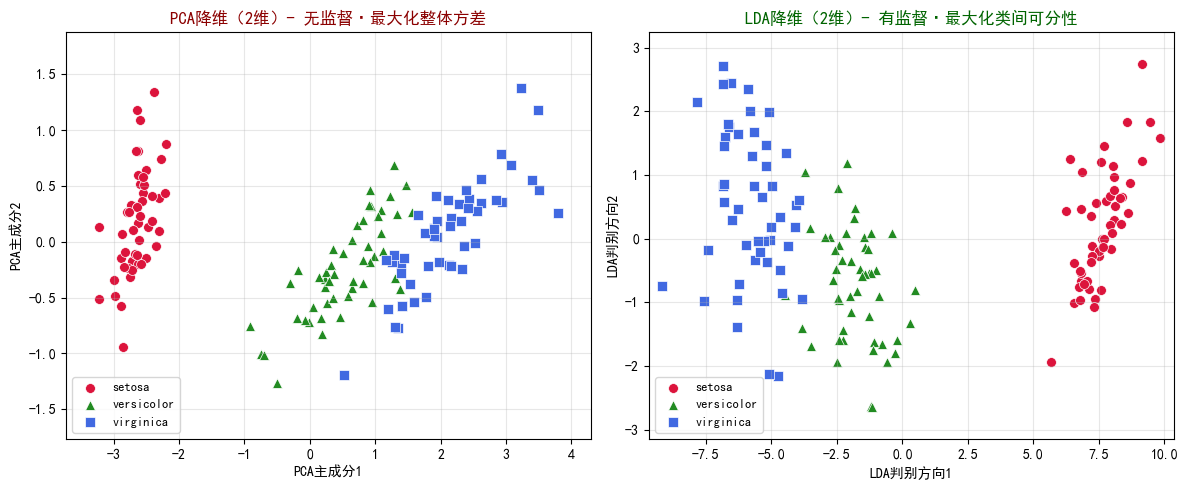

In [16]:
# 导入所需库
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np

# ---------------------- 基础配置：解决中文乱码+负号显示问题 ----------------------
plt.rcParams['font.sans-serif'] = ['SimHei']  # 适配Windows系统，其他系统可替换为Arial/思源黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号变成方块的问题
plt.rcParams['figure.figsize'] = (12, 5)     # 画布大小：宽12，高5
plt.rcParams['axes.grid'] = True             # 全局显示网格，提升可读性
plt.rcParams['grid.alpha'] = 0.3             # 网格透明度

# ---------------------- 1. 加载鸢尾花数据集，提取特征和标签 ----------------------
iris = datasets.load_iris()
X = iris.data  # 原始4维特征：花萼长/宽、花瓣长/宽
y = iris.target  # 3个类别标签：0=山鸢尾，1=变色鸢尾，2=维吉尼亚鸢尾
target_names = iris.target_names  # 类别名称，用于图例标注

# ---------------------- 2. 初始化模型并执行降维（统一降维到2维，保证对比公平） ----------------------
# 无监督PCA降维：仅最大化整体方差，不考虑类别
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 有监督LDA降维：最大化类间方差+最小化类内方差，依赖标签
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)  # LDA必须传入特征+标签，有监督学习

# ---------------------- 3. 创建画布：1行2列子图，分别展示PCA/LDA效果 ----------------------
fig, (ax1, ax2) = plt.subplots(1, 2)

# 定义可视化样式：3个类别对应不同颜色+标记，更易区分
colors = ['crimson', 'forestgreen', 'royalblue']
markers = ['o', '^', 's']

# ---------------------- 4. 绘制子图1：PCA降维（2维）结果 ----------------------
for color, marker, i, target_name in zip(colors, markers, [0, 1, 2], target_names):
    ax1.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                color=color, marker=marker, label=target_name, s=50, edgecolor='white', linewidth=0.5)
ax1.set_title('PCA降维（2维）- 无监督·最大化整体方差', fontsize=12, fontweight='bold', color='darkred')
ax1.set_xlabel('PCA主成分1', fontsize=10)
ax1.set_ylabel('PCA主成分2', fontsize=10)
ax1.legend(loc='best', fontsize=9)
ax1.set_xlim(X_pca[:,0].min()-0.5, X_pca[:,0].max()+0.5)
ax1.set_ylim(X_pca[:,1].min()-0.5, X_pca[:,1].max()+0.5)

# ---------------------- 5. 绘制子图2：LDA降维（2维）结果 ----------------------
for color, marker, i, target_name in zip(colors, markers, [0, 1, 2], target_names):
    ax2.scatter(X_lda[y == i, 0], X_lda[y == i, 1],
                color=color, marker=marker, label=target_name, s=50, edgecolor='white', linewidth=0.5)
ax2.set_title('LDA降维（2维）- 有监督·最大化类间可分性', fontsize=12, fontweight='bold', color='darkgreen')
ax2.set_xlabel('LDA判别方向1', fontsize=10)
ax2.set_ylabel('LDA判别方向2', fontsize=10)
ax2.legend(loc='best', fontsize=9)
ax2.set_xlim(X_lda[:,0].min()-0.5, X_lda[:,0].max()+0.5)
ax2.set_ylim(X_lda[:,1].min()-0.5, X_lda[:,1].max()+0.5)

# ---------------------- 6. 调整布局并显示图像 ----------------------
plt.tight_layout()  # 自动调整子图间距，避免标签重叠
plt.show()

# 9.4 使用矩阵分解法进行特征降维

问题描述：对非负特征矩阵进行降维

In [18]:
# 加载库
from sklearn.decomposition import NMF
from sklearn import datasets

# 加载数据
digits = datasets.load_digits()

# 加载特征矩阵
features = digits.data

# 创建NMF，进行变换并应用
nmf = NMF(n_components=10,random_state=1,max_iter=1000)
features_nmf = nmf.fit_transform(features)

# 显示结果
print('Original number of features:', features.shape[1])
print('Reduced number of features:', features_nmf.shape[1])

Original number of features: 64
Reduced number of features: 10


讨论：
NMF：非负矩阵分解，将矩阵分解为V ≈ WH
特点：所有元素非负，适用于文本数据、图像数据
n_components：指定降维后的维度
适用场景：特征值必须为非负的情况

# 9.5 对稀疏数据进行特征降维

In [23]:
# 加载多个库
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import  csr_matrix
from sklearn import datasets
import numpy as np

# 加载数据
digits = datasets.load_digits()

# 标准化特征矩阵
features = StandardScaler().fit_transform(digits.data)

#生成稀疏矩阵
features_sparse = csr_matrix(features)

#创建tsvd
tsvd = TruncatedSVD(n_components=10)

# 在稀疏矩阵上执行TSVD
features_sparse_tsvd = tsvd.fit(features_sparse).transform(features_sparse)

# 显示结果
print('Original number of features:', features_sparse.shape[1])
print('Reduced number of features:', features_sparse_tsvd.shape[1])

Original number of features: 64
Reduced number of features: 10


讨论：
TSVD：截断奇异值分解，适用于稀疏矩阵
优势：PCA不能直接用于稀疏矩阵，TSVD可以
与PCA关系：TSVD是PCA在稀疏矩阵上的实现
符号不稳定：多次拟合可能产生符号翻转，建议单次fit后多次transform

查看方差比例：

In [20]:
# 对前三个成分的信息量占比求和
tsvd.explained_variance_ratio_[0:3].sum()

0.30039385391886997

自动化选择成分数：

In [22]:
# 用比原始特征数量小1的值作为n_components的值，创建并运行TSVD
tsvd = TruncatedSVD(n_components=features_sparse.shape[1]-1)
features_tsvd = tsvd.fit(features)

# 获取方差百分比数组
tsvd_var_ratios = tsvd.explained_variance_ratio_

# 函数定义
def select_n_components2(var_ratio,goal_var):
    # 设置总方差的初始值
    total_variance =0.0

    # 设置特征数量的初始值
    n_components = 0

    # 遍历方差百分比数组的元素
    for explained_variance in var_ratio:

        # 将该百分比加入总方差
        total_variance += explained_variance

        # n_components的值加1
        n_components += 1

        # 如果达到目标阈值
        if total_variance >= goal_var:
            # 结束遍历
            break
    # 返回n_components的值
    return n_components

# 运行函数
select_n_components2(tsvd_var_ratios,0.95)

40

# 第九章完整知识点总结

| 方法            | 类型  | 适用数据    | 特点          | 主要参数                  |
| ------------- | --- | ------- | ----------- | --------------------- |
| **PCA**       | 线性  | 密集矩阵    | 无监督，最大化方差   | n\_components, whiten |
| **KernelPCA** | 非线性 | 线性不可分数据 | 核技巧映射到高维    | kernel, gamma         |
| **LDA**       | 线性  | 分类问题    | 有监督，最大化类间可分 | n\_components         |
| **NMF**       | 线性  | 非负矩阵    | 所有元素非负      | n\_components         |
| **TSVD**      | 线性  | 稀疏矩阵    | 适用于稀疏数据     | n\_components         |


## 选择策略：

### 1.数据类型：

密集数据 → PCA或KernelPCA
稀疏数据 → TSVD
分类任务 → LDA
非负约束 → NMF

### 2.成分数量选择

指定方差比例（0.95或0.99）
使用explained_variance_ratio_计算累计方差
通过select_n_components()函数自动选择

### 3.注意事项

降维前通常需要标准化（StandardScaler）
TSVD存在符号不稳定问题，避免多次fit
KernelPCA计算成本较高，大数据集慎用
LDA需要标签信息，是有监督降维